# BART Capstone Project

### Analysing ridership data collected over a decade long period to predict seat availability on the BART using regression models.The Bay Area Rapid Trasit has over 800,000 daily passengers, and is the fifth biggest public transportation system in the country. A big slice of the ridership tends to commuting residents during rush hour, when trains can contain over 5000 passengers.  This causes overcrowding in cars and hence a metric to predict seat availablity can help riders decide between their time of travel or convinience of a seat. 

### Using these metrics we can provide further insight into traffic along routes and population denisty. Understanding those trends are key to be able to provide advise on future expansion plans for the BART infrastructure and its subsidiaries. 




#### Import files

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image

p='./'

#### Loading GTFS information through format recieved online 

In [9]:
stops =            pd.read_csv(p+'datasets/bart/stops.txt')
agency =           pd.read_csv(p+'datasets/bart/agency.txt')
calendar =         pd.read_csv(p+'datasets/bart/calendar.txt')
calendar_dates =   pd.read_csv(p+'datasets/bart/calendar_dates.txt')
fare_attributes =  pd.read_csv(p+'datasets/bart/fare_attributes.txt')
fare_rules =       pd.read_csv(p+'datasets/bart/fare_rules.txt')
feed_info =        pd.read_csv(p+'datasets/bart/feed_info.txt')
frequencies =      pd.read_csv(p+'datasets/bart/frequencies.txt')
routes =           pd.read_csv(p+'datasets/bart/routes.txt')
shapes =           pd.read_csv(p+'datasets/bart/shapes.txt')
stop_times =       pd.read_csv(p+'datasets/bart/stop_times.txt')
transfers =        pd.read_csv(p+'datasets/bart/transfers.txt')
trips =            pd.read_csv(p+'datasets/bart/trips.txt');



### BART system Map

In [10]:
bartmap = Image(filename=p+'datasets/bart/system-map.gif')

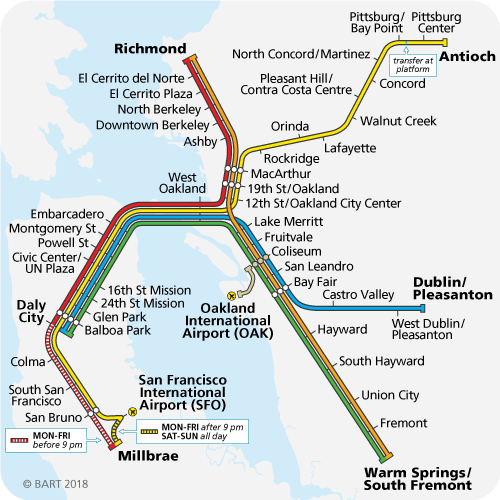

In [11]:
bartmap

##### List of BART stations currently operational 

In [12]:
stops['stop_name']

0            12th St. Oakland City Center BART Station
1                        16th St. Mission BART Station
2                        19th St. Oakland BART Station
3                        24th St. Mission BART Station
4                                 Antioch BART Station
5                                   Ashby BART Station
6                             Balboa Park BART Station
7                                Bay Fair BART Station
8                           Castro Valley BART Station
9                   Civic Center/UN Plaza BART Station
10                               Coliseum BART Station
11                                  Colma BART Station
12                                Concord BART Station
13                              Daly City BART Station
14                      Downtown Berkeley BART Station
15                      Dublin/Pleasanton BART Station
16                   El Cerrito del Norte BART Station
17                       El Cerrito Plaza BART Station
18        

In [13]:
stops.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,12TH,12th St. Oakland City Center BART Station,NaN,37.803768,-122.271450,12TH,http://www.bart.gov/stations/12TH/,0,NaN,NaN,1
1,16TH,16th St. Mission BART Station,NaN,37.765062,-122.419694,16TH,http://www.bart.gov/stations/16TH/,0,NaN,NaN,1
2,19TH,19th St. Oakland BART Station,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
3,24TH,24th St. Mission BART Station,NaN,37.752470,-122.418143,24TH,http://www.bart.gov/stations/24TH/,0,NaN,NaN,1
4,ANTC,Antioch BART Station,NaN,37.995388,-121.780420,ANTC,http://www.bart.gov/stations/ANTC/,0,NaN,NaN,1


In [1]:
agency.head()

NameError: name 'agency' is not defined

In [15]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,WKDY,1,1,1,1,1,0,0,20180910,20190910
1,SAT,0,0,0,0,0,1,0,20180910,20190910
2,SUN,0,0,0,0,0,0,1,20180910,20190910


In [16]:
calendar_dates

,service_id,date,exception_type
0,SUN,20181122,1
1,WKDY,20181122,2
2,SUN,20181225,1
3,WKDY,20181225,2
4,SUN,20190101,1
5,WKDY,20190101,2
6,SAT,20190121,1
7,WKDY,20190121,2
8,SUN,20190218,1
9,WKDY,20190218,2


In [17]:
fare_rules.head()

,fare_id,route_id,origin_id,destination_id,contains_id
0,128,NaN,SSAN,SSAN,NaN
1,76,NaN,SSAN,SBRN,NaN
2,167,NaN,SSAN,SFIA,NaN
3,76,NaN,SSAN,MLBR,NaN
4,145,NaN,SSAN,WDUB,NaN


In [18]:
fare_attributes.head()

,fare_id,price,currency_type,payment_method,transfers,transfer_duration
0,50,2.50,USD,1,NaN,NaN
1,51,2.55,USD,1,NaN,NaN
2,52,2.60,USD,1,NaN,NaN
3,53,2.65,USD,1,NaN,NaN
4,54,2.70,USD,1,NaN,NaN


Text(0.5,1,'FARE for BART Routes')

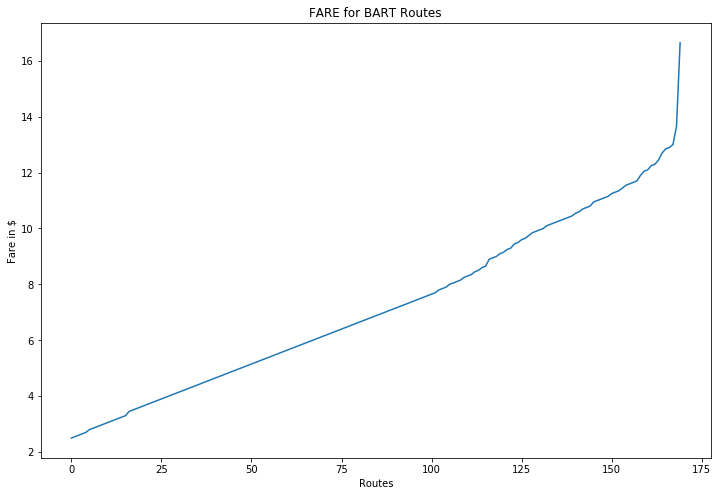

In [19]:
plt.figure(figsize=(12,8))
plt.plot(fare_attributes['price'])
plt.xlabel('Routes')
plt.ylabel('Fare in $')
plt.title('FARE for BART Routes')

As we can see above, as the distance between routes increases, so does the fare proportionaly. However for the longest routes, we can see a sharp uptick. This is to compensate for the increased distance in the end of the lines. One of these routes is the WARM SPRINGS-DALY CITY line, encompossing over 50 miles of track, and hence the high price

In [20]:
feed_info.head()

,feed_publisher_name,feed_publisher_url,feed_lang,feed_start_date,feed_end_date,feed_version
0,Bay Area Rapid Transit,http://www.bart.gov,en,20180910,20190910,48


In [21]:
frequencies.head()

,trip_id,start_time,end_time,headway_secs


In [22]:
routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,BART,NaN,Antioch - SFIA/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ffff33,NaN
1,3,BART,NaN,Warm Springs/South Fremont - Richmond,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff9933,NaN
2,5,BART,NaN,Warm Springs/South Fremont - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,339933,NaN
3,7,BART,NaN,Richmond - Daly City/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff0000,NaN
4,11,BART,NaN,Dublin/Pleasanton - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,0099cc,NaN
5,19,BART,NaN,Oakland Airport - Coliseum,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,d5cfa3,NaN


In [23]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,01_shp,38.018937,-121.942073,0
1,01_shp,38.018920,-121.942449,1
2,01_shp,38.018917,-121.942633,2
3,01_shp,38.018919,-121.942820,3
4,01_shp,38.018915,-121.943121,4


In [24]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,3650800SUN,08:00:00,08:00:00,LAFY,1,Millbrae,NaN,NaN,NaN,1
1,3650800SUN,08:05:00,08:05:00,ORIN,2,Millbrae,NaN,NaN,NaN,1
2,3650800SUN,08:11:00,08:11:00,ROCK,3,Millbrae,NaN,NaN,NaN,1
3,3650800SUN,08:15:00,08:15:00,MCAR,4,Millbrae,NaN,NaN,NaN,1
4,3650800SUN,08:18:00,08:18:00,19TH,5,Millbrae,NaN,NaN,NaN,1


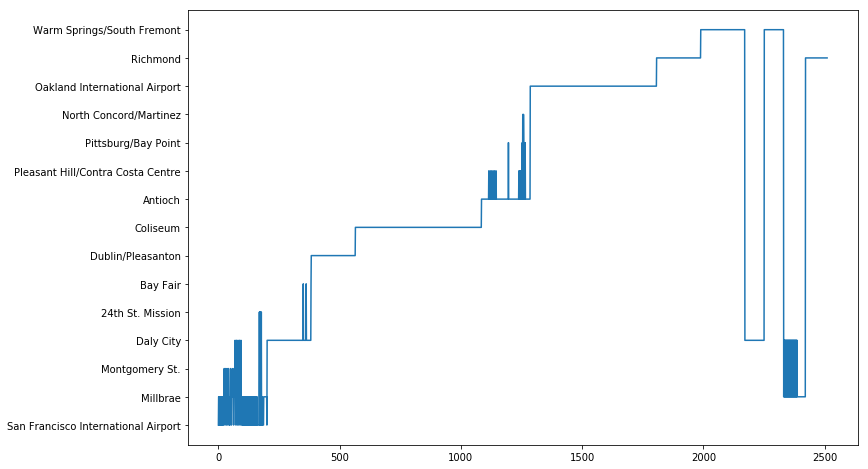

In [61]:
plt.figure(figsize=(12,8))
plt.plot(trips['trip_headsign'])

Note: The larger the horizontal length of the line, suggests a higher number of stops on that line 

### EDA for ridership report that I got from BART.gov

#### 2014 Weekday Ridership

In [21]:
jan2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_January2014.xlsx')
feb2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_February2014.xlsx')
march2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_March2014.xlsx')
april2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_April2014.xlsx')
may2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_May2014.xlsx')
june2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_June2014.xlsx')
july2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_July2014.xlsx')
aug2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_August2014.xlsx')
sept2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_September2014.xlsx')
oct2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_October2014.xlsx')
nov2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_November2014.xlsx')
dec2014= pd.read_excel(p+'datasets/bart/ridership/Ridership_December2014.xlsx')

#### 2015 Weekday Ridership

In [26]:
jan2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_January2015.xlsx')
feb2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_February2015.xlsx')
march2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_March2015.xlsx')
april2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_April2015.xlsx')
may2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_May2015.xlsx')
june2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_June2015.xlsx')
july2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_July2015.xlsx')
aug2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_August2015.xlsx')
sept2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_September2015.xlsx')
oct2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_October2015.xlsx')
nov2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_November2015.xlsx')
dec2015= pd.read_excel(p+'datasets/bart/ridership/Ridership_December2015.xlsx')

#### 2016 Weekday Ridership

In [27]:
jan2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_January2016.xlsx')
feb2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_February2016.xlsx')
march2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_March2016.xlsx')
april2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_April2016.xlsx')
may2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_May2016.xlsx')
june2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_June2016.xlsx')
july2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_July2016.xlsx')
aug2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_August2016.xlsx')
sept2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_September2016.xlsx')
oct2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_October2016.xlsx')
nov2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_November2016.xlsx')
dec2016= pd.read_excel(p+'datasets/bart/ridership/Ridership_December2016.xlsx')

#### 2017 Weekday Ridership

In [28]:

jan2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_January2017.xlsx')
feb2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_February2017.xlsx')
march2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_March2017.xlsx')
april2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_April2017.xlsx')
may2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_May2017.xlsx')
june2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_June2017.xlsx')
july2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_July2017.xlsx')
aug2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_August2017.xlsx')
sept2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_September2017.xlsx')
oct2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_October2017.xlsx')
nov2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_November2017.xlsx')
dec2017= pd.read_excel(p+'datasets/bart/ridership/Ridership_December2017.xlsx')

#### Function to format dataframes 

In [29]:
def createdatanew(df):
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.iloc[:,:48]
    df.columns.values[0] = 'Station'
    df.set_index('Station',inplace=True)
    return df

In [30]:
def createdata(df):
    df.columns = df.iloc[0]
    df = df[1:]
    df.columns.values[0] = 'Station'
    df.set_index('Station',inplace=True)
    return df

What one typical dataframe looks like. It is correlated between all the BART stations accounting for a 47x47 Dataframe including Entry and Exit Totals. In this scenario it is for weekdays in December of 2017

In [31]:
jan2015 = createdatanew(jan2015)
feb2015 = createdatanew(feb2015)
march2015 = createdatanew(march2015)
april2015 = createdatanew(april2015)
may2015 = createdatanew(may2015)
june2015 = createdatanew(june2015)
july2015 = createdatanew(july2015)
aug2015 = createdatanew(aug2015)
sept2015 = createdatanew(sept2015)
oct2015 = createdatanew(oct2015)
nov2015 = createdatanew(nov2015)
dec2015 = createdatanew(dec2015)


In [32]:
jan2016 = createdatanew(jan2016)
feb2016 = createdata(feb2016)
march2016 = createdata(march2016)
april2016 = createdata(april2016)
may2016 = createdata(may2016)
june2016 = createdata(june2016)
july2016 = createdata(july2016)
aug2016 = createdata(aug2016)
sept2016 = createdata(sept2016)
oct2016 = createdata(oct2016)
nov2016 = createdata(nov2016)
dec2016 = createdata(dec2016)



In [33]:
jan2017 = createdata(jan2017)
feb2017 = createdata(feb2017)
march2017 = createdata(march2017)
april2017 = createdata(april2017)
may2017 = createdata(may2017)
june2017 = createdata(june2017)
july2017 = createdata(july2017)
aug2017 = createdata(aug2017)
sept2017 = createdata(sept2017)
oct2017 = createdata(oct2017)
nov2017 = createdata(nov2017)
dec2017 = createdata(dec2017)


#### List of months

In [34]:
list_of_months=[jan2015,feb2015,march2015,april2015,may2015,june2015,july2015,aug2015,sept2015,oct2015,
              nov2015,dec2015,jan2016,feb2016,march2016,april2016,may2016,june2016,july2016,aug2016,sept2016,oct2016,
              nov2016,dec2016,jan2017,feb2017,march2017,april2017,may2017,june2017,july2017,aug2017,sept2017,oct2017,
              nov2017,dec2017]

NOTE : Creating a function to be able to see the values between any 2 station for the last 36 months. By having these values we can condense 36 dataframes into one to find the mean or see a cluster of individual routes.

In [35]:
def value(entry, exit):
    values = []
    for i in range(len(list_of_months)):
        values.append(list_of_months[i][entry][exit])
    return values

Ridership from Montogomery Street Station to the Fremont Station for the past 36 months 

In [36]:
value('MT','FM')

[1529.1052631578948,
 1599.4736842105262,
 1559.7727272727273,
 1570.7727272727273,
 1559.6,
 1643.5,
 1638.8636363636363,
 1679.4285714285713,
 1724.2380952380952,
 1714.5714285714287,
 1686.3333333333333,
 1518.45,
 1686.3684210526317,
 1761.05,
 1758.7391304347825,
 1767.2857142857142,
 1764.7142857142858,
 1767.5454545454545,
 1729.1,
 1753.608695652174,
 1752.7619047619048,
 1756.65,
 1719.6842105263158,
 1490.6842105263158,
 1619.8,
 1594.0526315789473,
 1586.391304347826,
 1237.6,
 1237.6363636363637,
 1203.6818181818182,
 1252.5263157894738,
 1211.0434782608695,
 1206.6,
 1193.904761904762,
 1182.7368421052631,
 1010.5263157894736]

Index of stations in the system

In [37]:
dec2017.columns

Index([   'RM',    'EN',    'EP',    'NB',    'BK',    'AS',    'MA',    19.0,
          12.0,    'LM',    'FV',    'CL',    'SL',    'BF',    'HY',    'SH',
          'UC',    'FM',    'CN',    'PH',    'WC',    'LF',    'OR',    'RR',
          'OW',    'EM',    'MT',    'PL',    'CC',    16.0,    24.0,    'GP',
          'BP',    'DC',    'CM',    'CV',    'ED',    'NC',    'WP',    'SS',
          'SB',    'SO',    'MB',    'WD',    'OA',    'WS', 'Exits'],
      dtype='object', name=0)

## Scouting Individual High traffic routes and plotting

#### BARTMAP for reference 

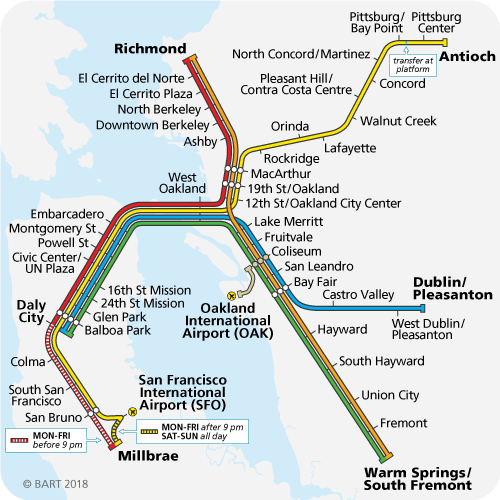

In [38]:
bartmap

#### Routes from Eastbay To Montegomery Street(Downtown)

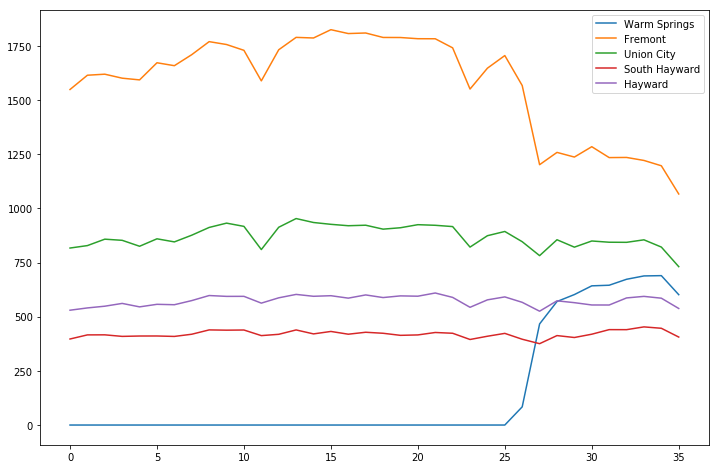

In [39]:
plt.figure(figsize=(12,8))
a = plt.plot(value('WS','MT'),label='Warm Springs')
plt.plot(value('FM','MT'),label ='Fremont')
plt.plot(value('UC','MT'),label = 'Union City')
plt.plot(value('SH','MT'),label = 'South Hayward')
plt.plot(value('HY','MT'), label = 'Hayward')
plt.legend()

Note: As we can see here, when the WARM SPRINGS station opened in 2017, traffic significantly dropped from the Fremont station but not from the other ones which suggests that people commute from further down the East and South bay to get to the first station

#### Routes from Pleasonton valley to Downtown SF

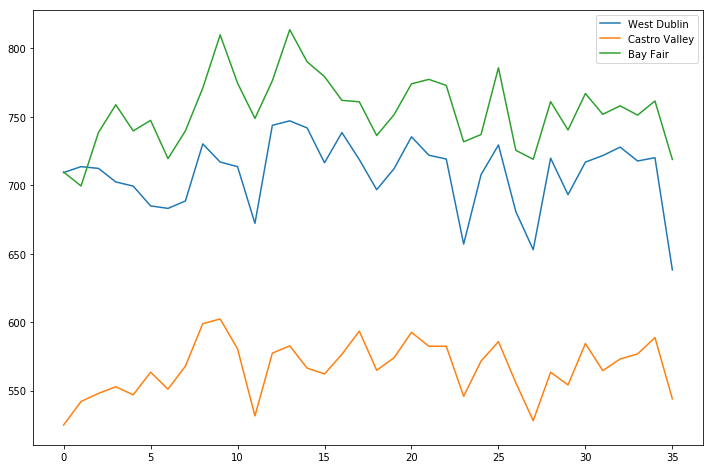

In [40]:
plt.figure(figsize=(12,8))
plt.plot(value('WD','MT'),label ='West Dublin')
plt.plot(value('CV','MT'),label = 'Castro Valley')
plt.plot(value('BF','MT'), label = 'Bay Fair')
plt.legend()

NOTE: Identifying trends between the monthly changes show as that all the stations from a similar area are directly correlated with each other to almost a perfect degree

##### In most of these routes, the decrease we see is in the month of december when commuters are on vacation, and hence a consistent dip in traffic in corresponding years as well 

#### Downtown Routes in San Francisco From Embarcadero Station

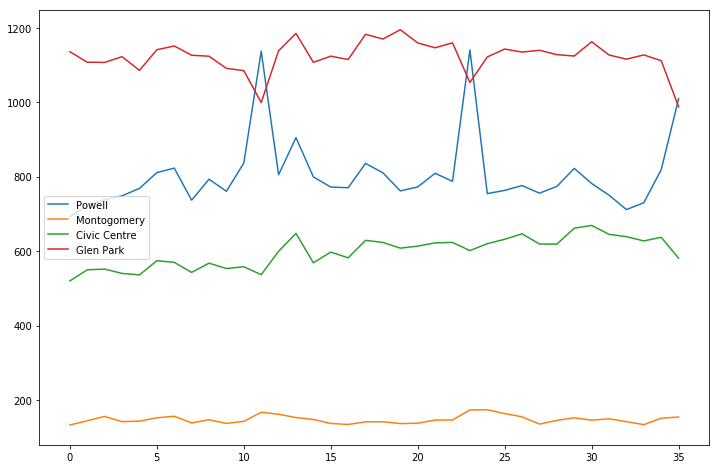

In [41]:
plt.figure(figsize=(12,8))
plt.plot(value('EM','PL'),label='Powell')
plt.plot(value('EM','MT'),label='Montogomery')
plt.plot(value('EM','CC'),label='Civic Centre')
plt.plot(value('EM','GP'),label='Glen Park')
plt.legend()


NOTE: The low traffic between the Embarcadero and Montegomery lines is because they are in essence the 2 closest stations in the BART system, hence a low demand to travel between them

### Routes from Richmond/Berkelely into Downtown SFO

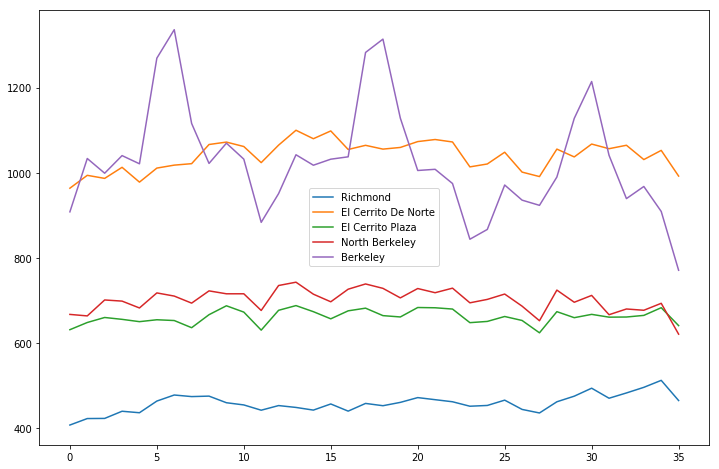

In [62]:
plt.figure(figsize=(12,8))
plt.plot(value('RM','MT'),label='Richmond')
plt.plot(value('EN','MT'),label='El Cerrito De Norte')
plt.plot(value('EP','MT'),label='El Cerrito Plaza')
plt.plot(value('NB','MT'),label='North Berkeley')
plt.plot(value('BK','MT'),label='Berkeley')
plt.plot
plt.legend()



NOTE: As we can see above, the fluctuation in the Berkely line is very telling. In the months between May-August, traffic peaks as students from UC Berkeley come to the city more often during the summer. In the Winter months, the dip is more pronounded as students usually go home for the holidays

### Creating a Dataframe with every possible route for the last 36 months. 

In [42]:
df =pd.DataFrame(pd.Series(value('MT','PL')))

In [43]:
df = df.T

In [44]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,309.052632,329.842105,307.681818,322.863636,337.05,346.454545,351.545455,309.095238,341.571429,343.952381,...,322.043478,315.5,312.818182,326.954545,297.315789,303.347826,310.55,287.0,323.736842,382.789474


In [45]:
len(list_of_months), df.shape


(36, (1, 36))

Note: The function below has 2 for loops. This is so that at first it can iterate through the stations for the entry and then for the exit. By doing so, it runs through 43^2 routes for the last 36 months. The if statements are in place to make sure the stations are in string format to be entered into the dataframe

In [46]:
for station in dec2017.columns[:-1]:
    if type(station) == str:
        for stationname in dec2017.columns[:-1]:
            if type(stationname) == str: 
                df = pd.concat([df,pd.DataFrame(value(station,stationname)).T], axis=0)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,309.052632,329.842105,307.681818,322.863636,337.05,346.454545,351.545455,309.095238,341.571429,343.952381,...,322.043478,315.50,312.818182,326.954545,297.315789,303.347826,310.55,287.000000,323.736842,382.789474
0,14.368421,12.157895,13.363636,14.636364,13.15,14.500000,15.409091,14.000000,15.952381,13.238095,...,13.521739,10.80,12.318182,13.181818,12.736842,14.826087,14.30,13.428571,14.052632,13.631579
0,148.842105,151.210526,150.636364,146.727273,143.30,145.090909,144.136364,147.761905,159.619048,165.000000,...,151.869565,142.15,144.090909,135.000000,128.526316,142.173913,151.75,152.523810,143.736842,136.000000
0,114.578947,114.263158,118.227273,116.454545,115.75,111.454545,113.090909,113.761905,117.857143,122.333333,...,109.347826,104.25,105.318182,95.090909,90.210526,88.173913,86.75,86.952381,88.631579,87.947368
0,126.526316,131.052632,127.227273,120.181818,127.30,92.363636,78.772727,88.285714,111.238095,113.761905,...,87.521739,78.20,82.545455,67.727273,60.526316,68.565217,85.45,87.619048,79.157895,67.526316
0,500.157895,559.842105,541.454545,540.454545,487.75,483.318182,477.636364,471.714286,557.571429,553.047619,...,507.173913,496.55,463.136364,433.363636,446.157895,456.130435,506.75,513.857143,492.684211,381.263158
0,113.052632,106.736842,107.090909,116.909091,122.50,116.363636,112.727273,118.000000,121.285714,122.285714,...,114.826087,110.15,120.818182,114.500000,112.315789,105.217391,115.70,112.761905,118.000000,108.421053
0,169.421053,186.315789,187.863636,186.272727,178.15,180.318182,174.409091,183.238095,190.523810,187.380952,...,169.739130,160.05,169.681818,162.590909,151.315789,162.260870,170.80,173.952381,166.631579,156.631579
0,51.894737,66.000000,59.636364,56.772727,53.70,59.500000,49.863636,49.619048,71.333333,72.857143,...,49.434783,44.45,43.863636,55.045455,44.157895,43.347826,48.20,47.428571,45.157895,37.263158
0,99.631579,108.105263,105.500000,98.181818,100.45,108.409091,110.727273,106.571429,110.333333,106.047619,...,93.043478,88.60,92.636364,90.636364,90.210526,93.347826,81.55,91.761905,96.631579,93.263158


In [47]:
#Assining the column names to the dataframe
df.columns=['jan2015','feb2015','march2015','april2015','may2015','june2015','july2015','aug2015','sept2015','oct2015',
              'nov2015','dec2015','jan2016','feb2016','march2016','april2016','may2016','june2016','july2016','aug2016','sept2016',
            'oct2016','nov2016','dec2016','jan2017','feb2017','march2017','april2017','may2017','june2017','july2017','aug2017','sept2017','oct2017',
              'nov2017','dec2017']


In [48]:
#Checking the shape of the dataframe to add row indexes
df.shape

(1765, 36)

Note: The function below accounts for the row indexes. It operates in the same way the dataframe function ran, but this time to create station-station pairs to assign to each row.

In [67]:
station_pairs = ['drop_row']
for station in dec2017.columns[:-1]:
    if type(station) == str:
        for stationname in dec2017.columns[:-1]:
            if type(stationname) == str: 
                station_pairs.append(station + '-' + stationname)
#station_pairs

In [50]:
len(station_pairs)

1765

In [51]:
df['stations'] = pd.Series(station_pairs).values

In [52]:
df = df.set_index('stations')

In [53]:
df = df.iloc[1:]

In [68]:
df


,jan2015,feb2015,march2015,april2015,may2015,june2015,july2015,aug2015,sept2015,oct2015,...,march2017,april2017,may2017,june2017,july2017,aug2017,sept2017,oct2017,nov2017,dec2017
stations,,,,,,,,,,,,,,,,,,,,,
RM-RM,14.368421,12.157895,13.363636,14.636364,13.15,14.500000,15.409091,14.000000,15.952381,13.238095,...,13.521739,10.80,12.318182,13.181818,12.736842,14.826087,14.30,13.428571,14.052632,13.631579
RM-EN,148.842105,151.210526,150.636364,146.727273,143.30,145.090909,144.136364,147.761905,159.619048,165.000000,...,151.869565,142.15,144.090909,135.000000,128.526316,142.173913,151.75,152.523810,143.736842,136.000000
RM-EP,114.578947,114.263158,118.227273,116.454545,115.75,111.454545,113.090909,113.761905,117.857143,122.333333,...,109.347826,104.25,105.318182,95.090909,90.210526,88.173913,86.75,86.952381,88.631579,87.947368
RM-NB,126.526316,131.052632,127.227273,120.181818,127.30,92.363636,78.772727,88.285714,111.238095,113.761905,...,87.521739,78.20,82.545455,67.727273,60.526316,68.565217,85.45,87.619048,79.157895,67.526316
RM-BK,500.157895,559.842105,541.454545,540.454545,487.75,483.318182,477.636364,471.714286,557.571429,553.047619,...,507.173913,496.55,463.136364,433.363636,446.157895,456.130435,506.75,513.857143,492.684211,381.263158
RM-AS,113.052632,106.736842,107.090909,116.909091,122.50,116.363636,112.727273,118.000000,121.285714,122.285714,...,114.826087,110.15,120.818182,114.500000,112.315789,105.217391,115.70,112.761905,118.000000,108.421053
RM-MA,169.421053,186.315789,187.863636,186.272727,178.15,180.318182,174.409091,183.238095,190.523810,187.380952,...,169.739130,160.05,169.681818,162.590909,151.315789,162.260870,170.80,173.952381,166.631579,156.631579
RM-LM,51.894737,66.000000,59.636364,56.772727,53.70,59.500000,49.863636,49.619048,71.333333,72.857143,...,49.434783,44.45,43.863636,55.045455,44.157895,43.347826,48.20,47.428571,45.157895,37.263158
RM-FV,99.631579,108.105263,105.500000,98.181818,100.45,108.409091,110.727273,106.571429,110.333333,106.047619,...,93.043478,88.60,92.636364,90.636364,90.210526,93.347826,81.55,91.761905,96.631579,93.263158


The bottem left part of the dataframe contains zeroes as the WARM SPRINGS BART station only opened up in the beggining of 2017

## Modelling 

In [55]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [56]:
# Create our X and y dataframes.
X = df.drop('dec2017',axis=1)
y = df['dec2017']

# Do a train-test split using a test_size of 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=42)
#Initialize Linear Regression
linmod= LinearRegression()

#Fit the model 
linmod.fit(X_train,y_train)

# Print out the intercept and coefficients.
print('The y-intercept is :',linmod.intercept_)
print('The coefficients are :',linmod.coef_)



The y-intercept is : -0.2357157034778652
The coefficients are : [ 0.25400443 -0.25570938  0.13218643 -0.20958768 -0.02155814 -0.02146213
 -0.03546118  0.04591835 -0.02779412  0.20855322 -0.22804717  0.28779051
 -0.05625496 -0.0778751  -0.14819868  0.32509716  0.02895205 -0.29890491
  0.31528096 -0.088254   -0.06166527 -0.20999495 -0.29849511  0.56150082
 -0.11615208  0.04197981  0.03040823  0.00930989  0.10319626  0.05641756
 -0.0883936   0.04325466 -0.051446    0.1927865   0.63410955]


In [57]:
predictions= linmod.predict(X_test)

score =linmod.score(X_test,y_test)
score

0.9992029075975579

In [66]:
predictions[:5]

array([319.0528072 ,  82.60926681,  13.91955424,  29.45535044,
        53.82797338])

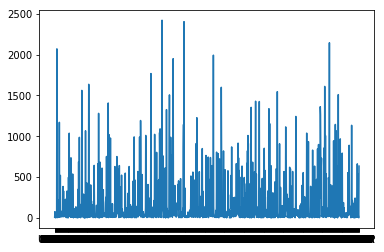

In [91]:
plt.plot(y_train)

In [64]:
y_train[:5]

stations
UC-OW     9.368421
DC-SS    76.947368
CM-SH     4.526316
SL-CV    40.368421
BF-BP    45.736842
Name: dec2017, dtype: float64

In [65]:
y_test[:5]

stations
CC-FM    334.631579
AS-EP     79.473684
WS-NB     14.842105
SB-MA     28.210526
CM-SB     52.210526
Name: dec2017, dtype: float64